In [10]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [11]:
# 讀取圖檔
img = cv2.imread('lena.bmp')
s = img.shape
block_size = 8
print(s)

(512, 512, 3)


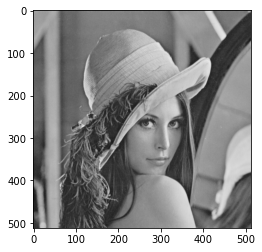

In [12]:
plt.imshow(img.astype('uint8'))
plt.show()

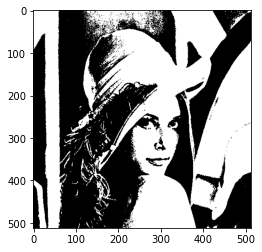

In [13]:
s = img.shape
bn = np.zeros(img.shape)
for i in range(s[2]):
    for j in range(s[0]):
        for k in range(s[1]):
            if img[j,k,i]>127:
                bn[j,k,i] = 255
            else:
                bn[j,k,i] = 0
plt.imshow(bn.astype('uint8'))
plt.show()

In [14]:
def downsample(img, block_size):
    s = img.shape
    row = int(s[0]/block_size)
    col = int(s[1]/block_size)
    ds = np.zeros((row, col, s[2]))
    for i in range(row):
        for j in range(col):
            ds[i, j, 0] = img[i*block_size, j*block_size, 0] 
            ds[i, j, 1] = img[i*block_size, j*block_size, 1] 
            ds[i, j, 2] = img[i*block_size, j*block_size, 2] 
    return ds

In [15]:
down_sample = downsample(bn, block_size)

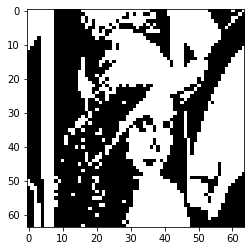

In [16]:
plt.imshow(down_sample.astype('uint8'))
plt.show()

In [28]:
def yokoi_four_connectivity(img):
    img_pad = np.pad(array=img, pad_width=((1,1),(1,1),(0,0)), mode='constant', constant_values=0)
    img_size = img.shape
    img_tmp = np.zeros(img_size)
    for i in range(1,img_size[0]+1): #1~
        for j in range(1,img_size[1]+1): #1~
            if img_pad[i, j, 0] != 0:
                #1.find q r s
                label = []
                #左
                if img_pad[i, j, 0] != img_pad[i, j-1, 0]:
                    label.append('s')
                else:
                    if img_pad[i-1, j-1, 0] != img_pad[i-1, j, 0]:
                        label.append('q')
                    else:
                        if img_pad[i-1, j-1, 0] > 0:
                            label.append('r')
                        else:
                            label.append('q')
                #上
                if img_pad[i, j, 0] != img_pad[i-1, j, 0]:
                    label.append('s')
                else:
                    if img_pad[i-1, j+1, 0] != img_pad[i, j+1, 0]:
                        label.append('q')
                    else:
                        if img_pad[i-1, j+1, 0] > 0:
                            label.append('r')
                        else:
                            label.append('q')
                #右
                if img_pad[i, j, 0] != img_pad[i, j+1, 0]:
                    label.append('s')
                else:
                    if img_pad[i+1, j+1, 0] != img_pad[i+1, j, 0]:
                        label.append('q')
                    else:
                        if img_pad[i+1, j+1, 0] > 0:
                            label.append('r')
                        else:
                            label.append('q')
                #下
                if img_pad[i, j, 0] != img_pad[i+1, j, 0]:
                    label.append('s')
                else:
                    if img_pad[i+1, j-1, 0] != img_pad[i, j-1, 0]:
                        label.append('q')
                    else:
                        if img_pad[i+1, j-1, 0] > 0:
                            label.append('r')
                        else:
                            label.append('q')
                        
                #2.Yokoi Connectivity Number
                if label.count('r') == 4:
                    img_tmp[i-1, j-1, 0] = 5
                    img_tmp[i-1, j-1, 1] = 5
                    img_tmp[i-1, j-1, 2] = 5
                else:
                    c = label.count('q')
                    img_tmp[i-1, j-1, 0] = c
                    img_tmp[i-1, j-1, 1] = c
                    img_tmp[i-1, j-1, 2] = c
    return img_tmp.astype('uint8')
                    

In [29]:
ans = yokoi_four_connectivity(down_sample)
#print(ans)

In [30]:
for i in range(s[0]//block_size):
    for j in range(s[1]//block_size):
        if ans[i, j, 0] == 0:
            print(' ',end = '')
        else:
            print(ans[i, j, 0], end = '')
    print()

11111111        12111111111122322221     111111111111           
15555551         115555555511 2 11  11   1155555555511          
15555551        1 2115555112  21112221    155555555551      21  
15555551        1 2 155112 22221511       1555555555511     1   
15555551         22 2112 22    121        15555555555511        
15555551         1  2  21 2     1   1     15555555555551        
15555551           12 1  121111    1321   155555555555511       
15111551           1322 1155551111        155555555555551       
111 1551            1  121555555511       155555555555511       
11  1551                 21155555511      15511155555511        
21  1551                 2 15555555111    1551 11555511         
1   1551                 2 155555555511   1551  115551         1
    1551               1121155555555551   1551   15511        12
    1551               15555555555555511  1551   1111        111
    1551        1     2221155555555555511 1151    11        1151
    1551        2    22 1